# Import all the required libraries

---



In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
data = pd.read_csv("AAPL_data.csv")
df=data
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
df = df.drop(['date', 'Name'], axis = 1)
df.head()

,open,high,low,close,volume
0,67.7142,68.4014,66.8928,67.8542,158168416
1,68.0714,69.2771,67.6071,68.5614,129029425
2,68.5014,68.9114,66.8205,66.8428,151829363
3,66.7442,67.6628,66.1742,66.7156,118721995
4,66.3599,67.3771,66.2885,66.6556,88809154


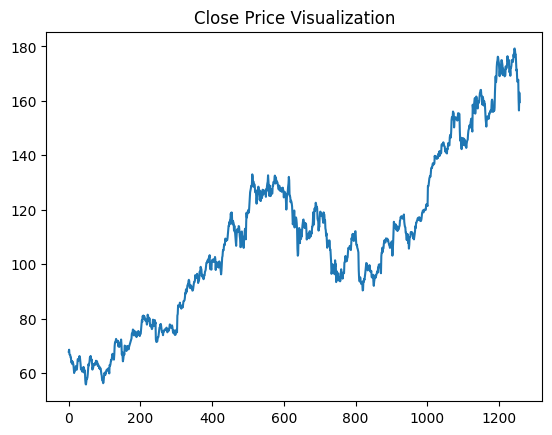

In [7]:
plt.title("Close Price Visualization")
plt.plot(df.close)

In [8]:
df

,open,high,low,close,volume
0,67.7142,68.4014,66.8928,67.8542,158168416
1,68.0714,69.2771,67.6071,68.5614,129029425
2,68.5014,68.9114,66.8205,66.8428,151829363
3,66.7442,67.6628,66.1742,66.7156,118721995
4,66.3599,67.3771,66.2885,66.6556,88809154
...,...,...,...,...,...
1254,167.1650,168.6200,166.7600,167.7800,47230787
1255,166.0000,166.8000,160.1000,160.5000,86593825
1256,159.1000,163.8800,156.0000,156.4900,72738522
1257,154.8300,163.7200,154.0000,163.0300,68243838


# Plotting moving averages of 100 day

---



In [9]:
ma100 = df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1254    166.9647
1255    166.9547
1256    166.9110
1257    166.9448
1258    166.9574
Name: close, Length: 1259, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

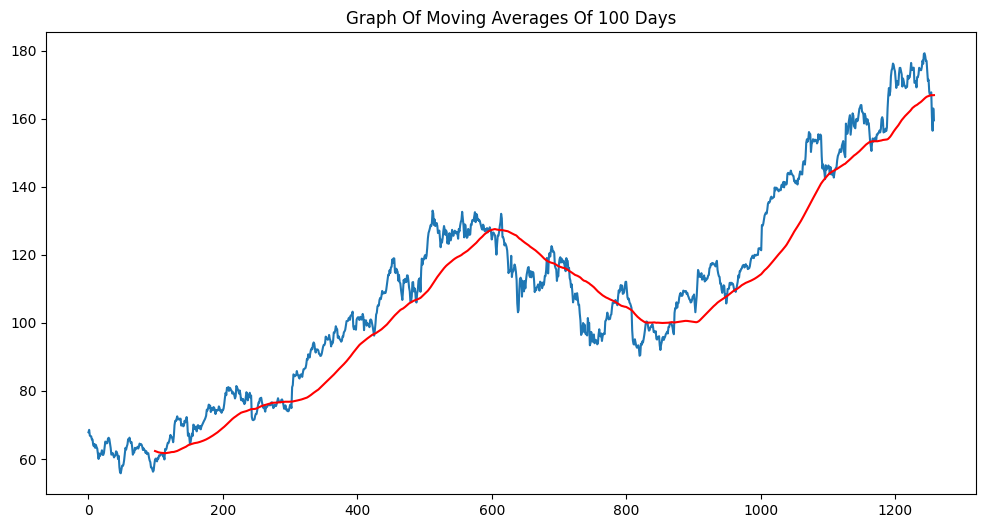

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [11]:
ma200 = df.close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1254    159.41200
1255    159.51110
1256    159.58135
1257    159.68515
1258    159.76465
Name: close, Length: 1259, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

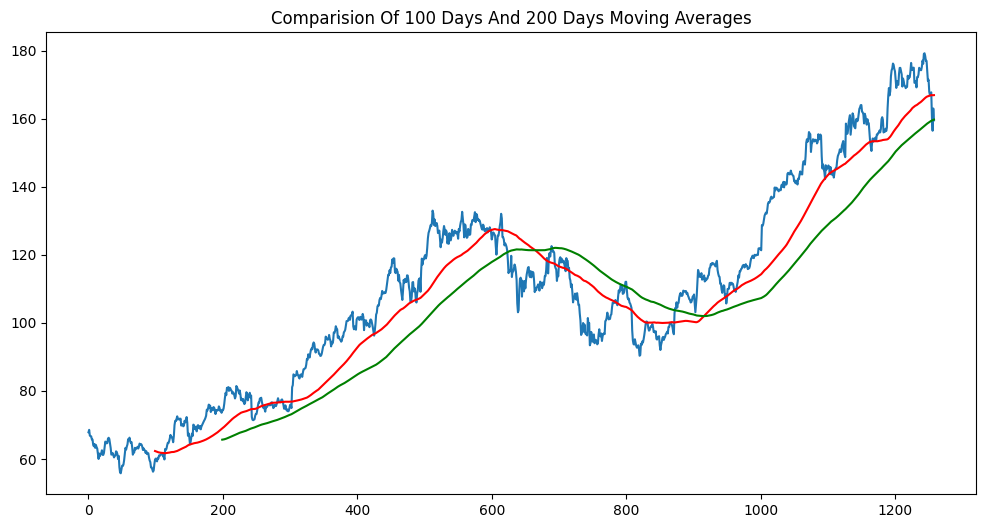

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [13]:
df.shape

(1259, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [14]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(881, 7)
(378, 7)


In [15]:
train.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [16]:
test.head()

,date,open,high,low,close,volume,Name
881,2016-08-09,108.23,108.94,108.01,108.81,26315204,AAPL
882,2016-08-10,108.71,108.90,107.76,108.00,24008505,AAPL
883,2016-08-11,108.52,108.93,107.85,107.93,27484506,AAPL
884,2016-08-12,107.78,108.44,107.78,108.18,18660434,AAPL
885,2016-08-15,108.14,109.54,108.08,109.48,25868209,AAPL


# Using MinMax scaler for normalization of the dataset

---



In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [19]:
data_training_array = scaler.fit_transform(train_close)
# data_training_array

array([[0.15625287],
       [0.1654123 ],
       [0.14315355],
       [0.1415061 ],
       [0.140729  ],
       [0.12883289],
       [0.12851816],
       [0.10790687],
       [0.10274433],
       [0.11153334],
       [0.09671274],
       [0.10812834],
       [0.09998692],
       [0.0941224 ],
       [0.07389966],
       [0.0546198 ],
       [0.07514561],
       [0.06500315],
       [0.07410688],
       [0.07621153],
       [0.08759087],
       [0.07012425],
       [0.0699766 ],
       [0.07765564],
       [0.0983032 ],
       [0.12061764],
       [0.11834203],
       [0.11388277],
       [0.11508468],
       [0.1320708 ],
       [0.13515978],
       [0.13063835],
       [0.11388277],
       [0.0964537 ],
       [0.07101273],
       [0.07264464],
       [0.07671147],
       [0.06881095],
       [0.06044805],
       [0.06601727],
       [0.06744195],
       [0.08355772],
       [0.08104121],
       [0.07265889],
       [0.05424938],
       [0.06607296],
       [0.02270299],
       [0.002

In [26]:
data_testing_array = scaler.transform(test_close)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)



In [21]:
x_train.shape

(781, 100, 1)

In [27]:
x_test = []
y_test = []

for i in range(100, data_testing_array.shape[0]):
    x_test.append(data_testing_array[i-100: i])
    y_test.append(data_testing_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [28]:
x_test.shape

(278, 100, 1)

# ML Model (LSTM)

---



In [22]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

# Training the model

---



In [30]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 25)

Epoch 1/5
25/25 [==============================] - 22s 557ms/step - loss: 0.0159 - MAE: 0.0944 - val_loss: 0.0122 - val_MAE: 0.0942
Epoch 2/5
25/25 [==============================] - 13s 542ms/step - loss: 0.0116 - MAE: 0.0828 - val_loss: 0.0064 - val_MAE: 0.0640
Epoch 3/5
25/25 [==============================] - 14s 527ms/step - loss: 0.0114 - MAE: 0.0810 - val_loss: 0.0075 - val_MAE: 0.0726
Epoch 4/5
25/25 [==============================] - 13s 532ms/step - loss: 0.0115 - MAE: 0.0787 - val_loss: 0.0086 - val_MAE: 0.0779
Epoch 5/5
25/25 [==============================] - 14s 555ms/step - loss: 0.0096 - MAE: 0.0742 - val_loss: 0.0085 - val_MAE: 0.0765


In [31]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_close.shape
test_close

In [33]:
past_100_days = pd.DataFrame(train_close[-100:])

In [34]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [35]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-35-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [36]:
final_df.head()

,0
0,105.80
1,105.92
2,105.91
3,106.72
4,106.13


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [38]:
input_data.shape

(478, 1)

# Testing the model

---



In [39]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [41]:
# Making predictions

y_pred = model.predict(x_test)

12/12 [==============================] - 1s 58ms/step


In [42]:
y_pred.shape

(378, 1)

In [43]:
y_test

array([0.2077148 , 0.19860549, 0.19781826, 0.20062978, 0.21524966,
       0.21412506, 0.21232569, 0.21075124, 0.21390013, 0.20434098,
       0.20816464, 0.19894287, 0.19376968, 0.18668466, 0.18533513,
       0.17611336, 0.17723797, 0.18432299, 0.19556905, 0.19523167,
       0.20265407, 0.17071525, 0.14383716, 0.16981556, 0.19804318,
       0.24100315, 0.28373819, 0.27642825, 0.26135852, 0.26124606,
       0.26102114, 0.27305443, 0.25157445, 0.25348628, 0.25584795,
       0.26551957, 0.24561404, 0.25539811, 0.2494377 , 0.25483581,
       0.25539811, 0.2648448 , 0.26675664, 0.2891363 , 0.29194782,
       0.30364372, 0.29959514, 0.30690508, 0.3060054 , 0.30510571,
       0.30116959, 0.30049483, 0.29532164, 0.30713   , 0.31387764,
       0.28396311, 0.27147998, 0.26293297, 0.26090868, 0.23785425,
       0.23897886, 0.21918578, 0.20805218, 0.2257085 , 0.23301844,
       0.23099415, 0.19624381, 0.2034413 , 0.172852  , 0.18859649,
       0.22098516, 0.22053531, 0.22177238, 0.24055331, 0.24134

In [44]:
y_pred

array([[0.12233546],
       [0.12619872],
       [0.13049375],
       [0.13522959],
       [0.14028111],
       [0.14560987],
       [0.15119788],
       [0.15692905],
       [0.16272247],
       [0.16849554],
       [0.17411429],
       [0.17952263],
       [0.18465126],
       [0.1894141 ],
       [0.19372964],
       [0.19755138],
       [0.20083731],
       [0.20356545],
       [0.20574814],
       [0.2074393 ],
       [0.2087121 ],
       [0.20965731],
       [0.21031547],
       [0.21066564],
       [0.21071523],
       [0.21052814],
       [0.21025136],
       [0.21014145],
       [0.21044534],
       [0.21132958],
       [0.21289343],
       [0.21514359],
       [0.2180785 ],
       [0.22160909],
       [0.22556663],
       [0.22975662],
       [0.23402372],
       [0.23819667],
       [0.24214864],
       [0.24578524],
       [0.24905443],
       [0.25193635],
       [0.2544494 ],
       [0.25663322],
       [0.25857002],
       [0.26034966],
       [0.26206157],
       [0.263

In [45]:
scaler.scale_

array([0.01124606])

In [46]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

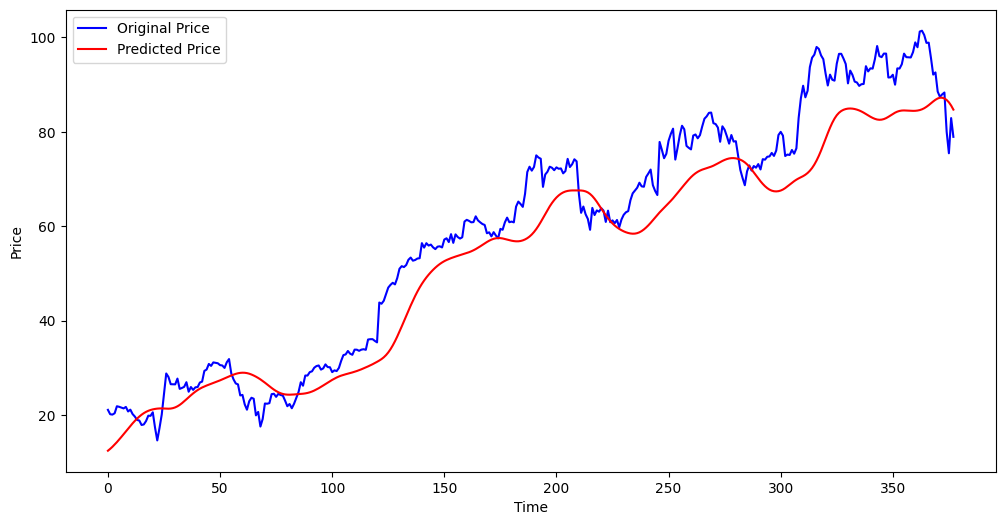

In [47]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [48]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  6.59447418832619
